In [1]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
from matplotlib import gridspec

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data_X = np.load('/Users/linggeli/neuroscience/data_numpy/spike_train.npy')
train_start_idx = 210
train_num_idx = 25
training = data_X[:, :, train_start_idx:(train_start_idx + train_num_idx)]
target = np.load('/Users/linggeli/neuroscience/data_numpy/odor_target.npy')

In [3]:
print(training.shape)

(194, 54, 25)


In [4]:
temp = training[0, :, :]
spike_points = np.zeros((54 * 25, 3))
i = 0
for j in range(54):
    for k in range(25):
        spike_points[i, 0] = j
        spike_points[i, 1] = k
        spike_points[i, 2] = temp[j, k]
        i += 1

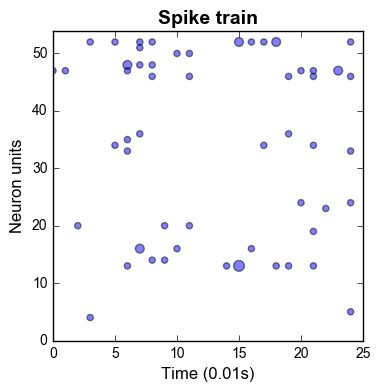

In [5]:
fig = plt.figure(figsize=(4, 4))
plt.scatter(spike_points[:, 1], spike_points[:, 0], 
            s=20*(spike_points[:, 2]), c='blue', alpha=0.5)
plt.ylim(0, 54)
plt.ylabel('Neuron units', fontsize=12)
plt.xlim(0, 25)
plt.xlabel('Time (0.01s)', fontsize=12)
plt.title('Spike train', fontsize=14, fontweight='bold')
plt.style.use('seaborn-white')
plt.show()

In [6]:
lfp_raw = np.load('/Users/linggeli/neuroscience/data_numpy/all_raw_lfp_data.npy')

In [7]:
print(lfp_raw.shape)

(248, 15, 4250)


In [8]:
trial_info = np.load('/Users/linggeli/neuroscience/data_numpy/all_trial_info.npy')

In [9]:
select = (trial_info[:, 0] == 1) & (trial_info[:, 1] == 1)

In [10]:
lfp_raw = lfp_raw[select, :, 2100:2350]
print(lfp_raw.shape)

(194, 15, 250)


In [11]:
lfp_temp = lfp_raw[0, :, :]

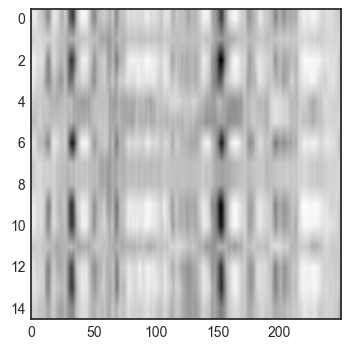

In [12]:
fig = plt.figure(figsize=(4, 4))
plt.imshow(lfp_temp, aspect='auto')

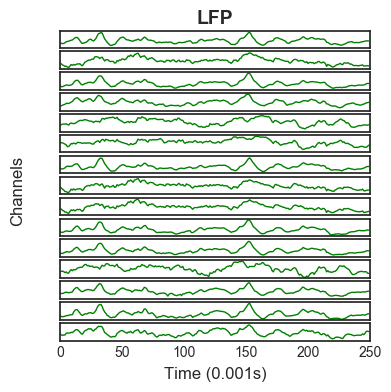

In [13]:
fig = plt.figure(figsize=(4, 4))
plt.style.use('seaborn-white')
for l in range(15):
    plt.subplot(15, 1, l + 1)
    plt.plot(lfp_temp[l, :], linewidth=1, c='green')
    plt.yticks([], [])
    plt.xticks([], [])
    if l == 0:
        plt.title('LFP', fontsize=14, fontweight='bold')
plt.xticks([0, 50, 100, 150, 200, 250], ['0', '50', '100', '150', '200', '250'])
fig.text(0.0, 0.5, 'Channels', va='center', rotation='vertical', fontsize=12)
plt.xlabel('Time (0.001s)', fontsize=12)
plt.show()

In [14]:
lfp_tetrode = [19, 4, 21, 20, 8, 9, 16, 1, 2, 23, 22, 7, 13, 14, 15]

In [15]:
tetrode_neuron = {1:4, 2:1, 4:1, 7:2, 8:4, 9:1, 13:4, 14:4, 15:5, 16:3, 19:9, 20:2, 21:6, 22:4, 23:4}

In [16]:
j = lfp_tetrode.index(23)
tetrode_lfp = lfp_temp[j, :]
print(tetrode_lfp.shape)
k = tetrode_neuron[1]
tetrode_spike = temp[-4:, :]
print(tetrode_spike.shape)

(250,)
(4, 25)


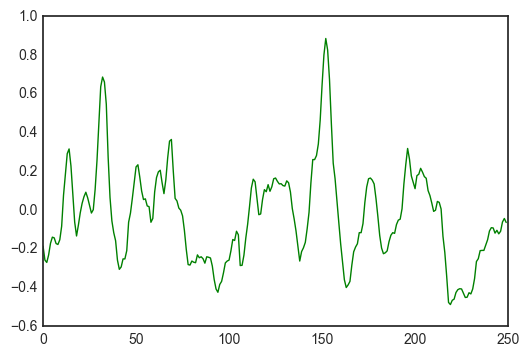

In [17]:
plt.plot(tetrode_lfp, linewidth=1, c='green')

In [18]:
tetrode_points = np.zeros((4 * 25, 3))
i = 0
for j in range(4):
    for k in range(25):
        tetrode_points[i, 0] = j
        tetrode_points[i, 1] = k
        tetrode_points[i, 2] = tetrode_spike[j, k]
        i += 1

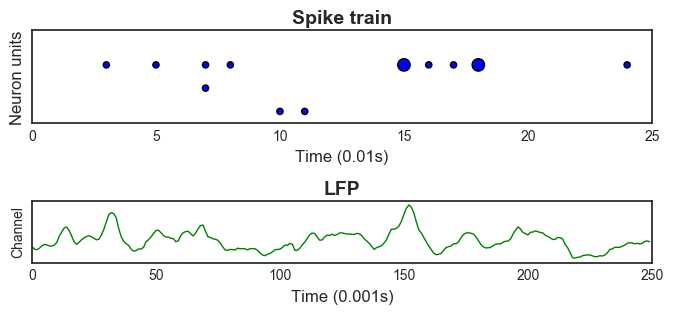

In [19]:
fig = plt.figure(figsize=(8, 3))
plt.style.use('seaborn-white')
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 2]) 
plt.subplot(gs[0])
plt.scatter(tetrode_points[:, 1], tetrode_points[:, 0], 
            s=20*(tetrode_points[:, 2])**2, c='blue')
plt.ylim(-0.5, 3.5)
plt.yticks([], [])
plt.ylabel('Neuron units', fontsize=12)
plt.xlim(0, 25)
plt.xlabel('Time (0.01s)', fontsize=12)
plt.title('Spike train', fontsize=14, fontweight='bold')
gs.update(wspace=0.025, hspace=1.0)
plt.subplot(gs[1])
plt.plot(tetrode_lfp, linewidth=1, c='green')
plt.xlabel('Time (0.001s)', fontsize=12)
plt.yticks([], [])
plt.ylabel('Channel')
plt.title('LFP', fontsize=14, fontweight='bold')
#fig.text(0.0, 0.5, 'Channels', va='center', rotation='vertical', fontsize=12)
plt.show()